In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/[Data1]drug_absorbance.csv')

### 0. import data set

In [ ]:
df.head()

,Concentration,Maximum Absorbance
0,0.00,3.96
1,0.05,3.78
2,0.10,4.55
3,0.15,4.60
4,0.20,5.90


In [ ]:
df.shape

(200, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Concentration       200 non-null    float64
 1   Maximum Absorbance  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


### 1. How to minimize cos finction?


**[Cost Funtion]**

* 예측값과 실제값의 차이를 최소화하는 W, b의 값을 찾는 함수
* 이 손실함수의 최솟값을 찾는 여러 기법 중 하나가 바로, 'Gradien descent algorithm'

**[Gradien descent algorithm]**

* 손실함수의 미분값을 이용하는 방법. 반복적인 미분을 통해 기울기가 0이 되는 최적값을 찾아나감.
* 손실함수 값이 -인 방향으로 파라미터를 계속해서 업데이트해나감 > **경사하강의 원리**
* Convex function의 형태인지 확인해야 함

  **Learning rate**
  * gradient descent의 파라미터 업데이트 과정(미분값 만큼 이동시키는 과정)에서 한 스텝에 얼마만큼 움직일지를 정함

  **Batch vs Stochastic**
  * Batch gradient descent(전체 데이터 셋에 대해 수행) vs Stochastic gradient descent, SGD(전체 데이터셋을 샘플링해 빠르게 최적값을 찾음)
  * SGD가 빠른 속도로 최적값을 찾을 수 있다는 장점은 존재하나, learning rate를 잘못 설정할 경우 local minima에 빠지게 될 가능성이 있음
  * 때문에 이 둘의 절충안인 mini-batch gradient descent를 사용함.
  (경우에 따라서 SGD가 mini-batch를 의미하기도함)
  

### 2.Implementation of Grdient Descent - Simple Linear Regression

iteration=0, 기울기=11.4131, 절편=14.4323


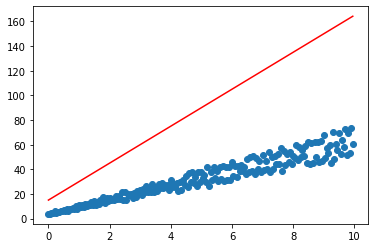

None
iteration=50, 기울기=4.5617, 절편=12.2520


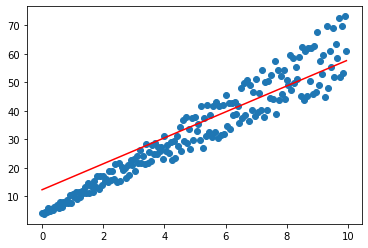

None
iteration=100, 기울기=4.7112, 절편=11.2649


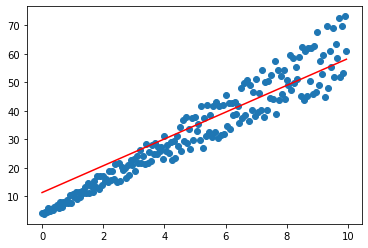

None
iteration=150, 기울기=4.8434, 절편=10.3923


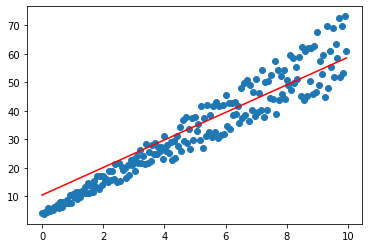

None
iteration=200, 기울기=4.9603, 절편=9.6208


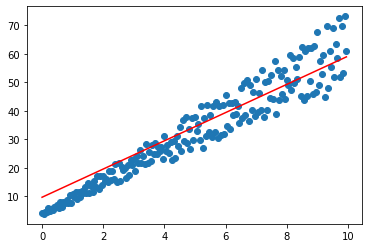

None
iteration=250, 기울기=5.0636, 절편=8.9389


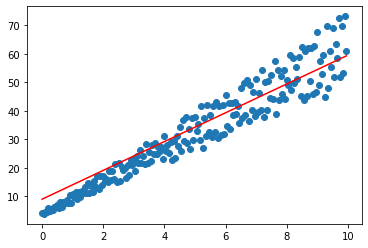

None


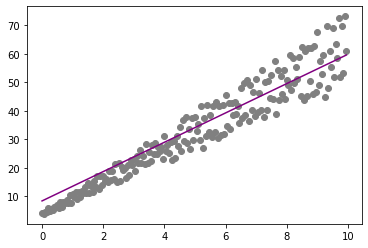

In [6]:
x = df['Concentration']
y = df['Maximum Absorbance']

# 넘파이 배열로 변환
x_data = np.array(x)
y_data = np.array(y)

# 초기 기울기 a와 절편 b의 값 세팅
a = 15
b = 15

# 학습률 세팅
lr = 0.005
iteration = 300

# 빈 array 생성
costs = []

# 경사하강 진행
for i in range(iteration):
  y_pred = a*x_data+b
  error = y_data - y_pred
  cost = (((y_pred-y_data)**2).mean())/2

  # 오차함수를 a로 편미분
  a_diff = -(2/len(x_data))*sum(x_data*(error))
  # 오차함수를 b로 편미분
  b_diff = -(2/len(x_data))*sum(error)

  a = a - lr * a_diff
  b = b - lr * b_diff

  costs.append(cost)

  if i%50 == 0 :
    plt.scatter(x,y)
    plt.plot(x_data,y_pred,color='red')
    print("iteration=%.f, 기울기=%.04f, 절편=%.04f" %(i, a, b))
    print(plt.show())

# 최종 모델 시각화
y_pred = a*x_data+b
plt.scatter(x,y,color='gray')
plt.plot([min(x_data),max(x_data)],[min(y_pred),max(y_pred)],color='purple')
plt.show()


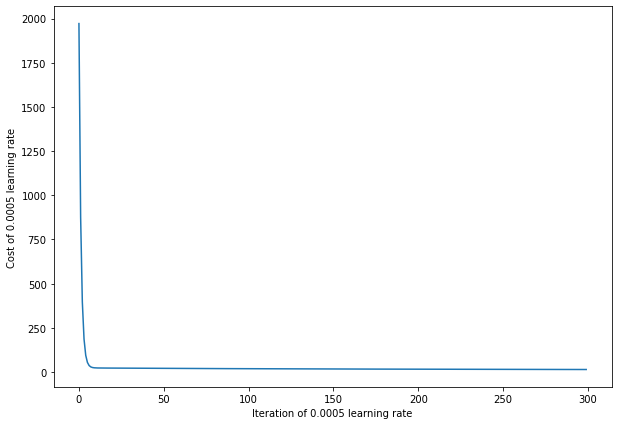

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(costs)
plt.xlabel('Iteration of 0.0005 learning rate')
plt.ylabel('Cost of 0.0005 learning rate')
plt.show()

### 3.Implementation of Grdient Descent - Multiple Linear Regression

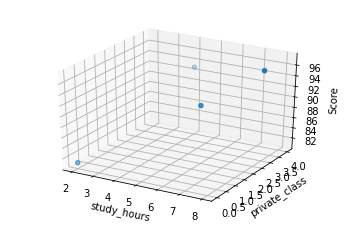

In [8]:
from mpl_toolkits import mplot3d

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

#그래프로 확인해 봅니다.
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11 
ax.scatter(x1, x2, y)
plt.show()

In [9]:
#리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸어 줍니다.(인덱스를 주어 하나씩 불러와 계산이 가능해 지도록 하기 위함입니다.)
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

# 기울기 a와 절편 b의 값을 초기화 합니다.
a1 = 0
a2 = 0
b = 0

#학습률을 정합니다.
lr = 0.05 

#몇 번 반복될지를 설정합니다.(0부터 세므로 원하는 반복 횟수에 +1을 해 주어야 합니다.)
epochs = 2001 

#경사 하강법을 시작합니다.
for i in range(epochs): # epoch 수 만큼 반복
    y_pred = a1 * x1_data + a2 * x2_data + b  #y를 구하는 식을 세웁니다
    error = y_data - y_pred  #오차를 구하는 식입니다.
    a1_diff = -(1/len(x1_data)) * sum(x1_data * (error)) # 오차함수를 a1로 미분한 값입니다. 
    a2_diff = -(1/len(x2_data)) * sum(x2_data * (error)) # 오차함수를 a2로 미분한 값입니다. 
    b_new = -(1/len(x1_data)) * sum(y_data - y_pred)  # 오차함수를 b로 미분한 값입니다. 
    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2값을 업데이트합니다.
    b = b - lr * b_new  # 학습률을 곱해 기존의 b값을 업데이트합니다.
    if i % 100 == 0:    # 100번 반복될 때마다 현재의 a1, a2, b값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

epoch=0, 기울기1=23.2000, 기울기2=10.5625, 절편=4.5250
epoch=100, 기울기1=6.4348, 기울기2=3.9893, 절편=43.9757
epoch=200, 기울기1=3.7255, 기울기2=3.0541, 절편=62.5766
epoch=300, 기울기1=2.5037, 기울기2=2.6323, 절편=70.9656
epoch=400, 기울기1=1.9527, 기울기2=2.4420, 절편=74.7491
epoch=500, 기울기1=1.7042, 기울기2=2.3562, 절편=76.4554
epoch=600, 기울기1=1.5921, 기울기2=2.3175, 절편=77.2250
epoch=700, 기울기1=1.5415, 기울기2=2.3001, 절편=77.5720
epoch=800, 기울기1=1.5187, 기울기2=2.2922, 절편=77.7286
epoch=900, 기울기1=1.5084, 기울기2=2.2886, 절편=77.7992
epoch=1000, 기울기1=1.5038, 기울기2=2.2870, 절편=77.8310
epoch=1100, 기울기1=1.5017, 기울기2=2.2863, 절편=77.8453
epoch=1200, 기울기1=1.5008, 기울기2=2.2860, 절편=77.8518
epoch=1300, 기울기1=1.5003, 기울기2=2.2858, 절편=77.8547
epoch=1400, 기울기1=1.5002, 기울기2=2.2858, 절편=77.8561
epoch=1500, 기울기1=1.5001, 기울기2=2.2857, 절편=77.8567
epoch=1600, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8569
epoch=1700, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8570
epoch=1800, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8571
epoch=1900, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8571
epoch=2000, 기울기1=1.5000, 기울기2=2

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


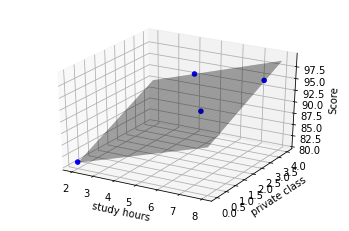

In [10]:
#참고 자료, 다중 선형회귀 '예측 평면' 3D로 보기

import statsmodels.api as statm
import statsmodels.formula.api as statfa
#from matplotlib.pyplot import figure

X = [i[0:2] for i in data]
y = [i[2] for i in data]

X_1=statm.add_constant(X)
results=statm.OLS(y,X_1).fit()

hour_class=pd.DataFrame(X,columns=['study_hours','private_class'])
hour_class['Score']=pd.Series(y)

model = statfa.ols(formula='Score ~ study_hours + private_class', data=hour_class)

results_formula = model.fit()

a, b = np.meshgrid(np.linspace(hour_class.study_hours.min(),hour_class.study_hours.max(),100),
                   np.linspace(hour_class.private_class.min(),hour_class.private_class.max(),100))

X_ax = pd.DataFrame({'study_hours': a.ravel(), 'private_class': b.ravel()})
fittedY=results_formula.predict(exog=X_ax)

fig = plt.figure()
graph = fig.add_subplot(111, projection='3d')

graph.scatter(hour_class['study_hours'],hour_class['private_class'],hour_class['Score'],
              c='blue',marker='o', alpha=1)
graph.plot_surface(a,b,fittedY.values.reshape(a.shape),
                   rstride=1, cstride=1, color='none', alpha=0.4)
graph.set_xlabel('study hours')
graph.set_ylabel('private class')
graph.set_zlabel('Score')
graph.dist = 11

plt.show()